## Основні приклади використання Pandas

Цей ноутбук допоможе вам ознайомитися з базовими концепціями Pandas. Ми почнемо з імпорту типових бібліотек для роботи з даними:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Серія

Серія схожа на список або одномірний масив, але з індексом. Усі операції виконуються відповідно до індексів.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Одним із частих застосувань серій є **часові ряди**. У часових рядах індекс має особливу структуру — зазвичай це діапазон дат або часових міток. Ми можемо створити такий індекс за допомогою `pd.date_range`.

Припустимо, у нас є серія, яка показує кількість продукту, купленого щодня, і ми знаємо, що кожної неділі нам також потрібно взяти один товар для себе. Ось як це можна змоделювати за допомогою серій:


Length of index is 366


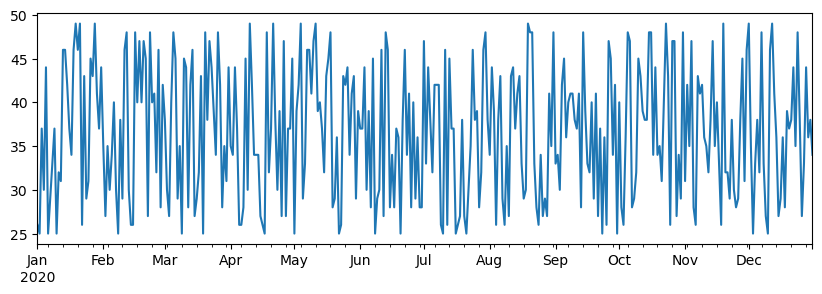

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Як ви можете бачити, у нас тут виникають проблеми, тому що в щотижневій серії дні, які не згадані, вважаються відсутніми (`NaN`), і додавання `NaN` до числа дає нам `NaN`. Щоб отримати правильний результат, нам потрібно вказати `fill_value` при додаванні серій:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


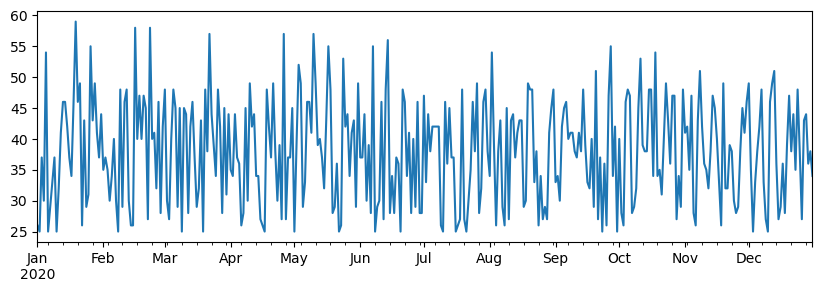

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

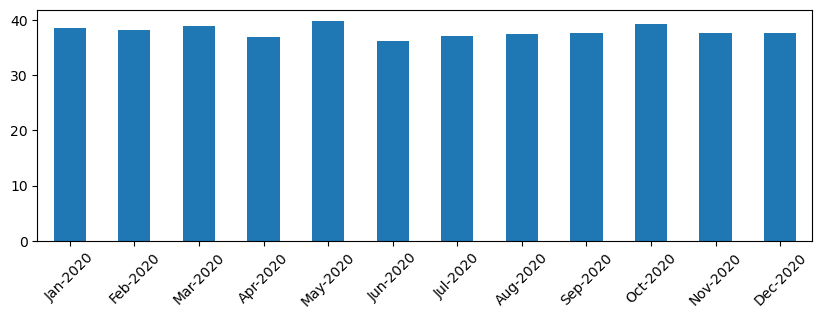

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame — це, по суті, набір серій з однаковим індексом. Ми можемо об'єднати кілька серій разом у DataFrame. Враховуючи серії `a` та `b`, визначені вище:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Ми також можемо використовувати Series як стовпці та задавати назви стовпців за допомогою словника:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Той самий результат можна досягти, транспонуючи (а потім перейменовуючи стовпці, щоб відповідати попередньому прикладу):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Вибір стовпців** з DataFrame можна виконати таким чином:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Вибір рядків** на основі виразів фільтра:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Спосіб роботи полягає в тому, що вираз `df['A']<5` повертає булеву серію, яка вказує, чи є вираз `True` або `False` для кожного елемента серії. Коли серія використовується як індекс, вона повертає підмножину рядків у DataFrame. Таким чином, неможливо використовувати довільний булевий вираз Python, наприклад, написання `df[df['A']>5 and df['A']<7]` буде неправильним. Натомість слід використовувати спеціальну операцію `&` на булевих серіях:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Створення нових обчислюваних стовпців**. Ми можемо легко створювати нові обчислювані стовпці для нашого DataFrame, використовуючи інтуїтивні вирази. Код нижче обчислює відхилення A від його середнього значення.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Те, що насправді відбувається, це обчислення ряду, а потім присвоєння цього ряду лівій стороні, створюючи інший стовпець.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Вибір рядків на основі чисел** можна здійснити за допомогою конструкції `iloc`. Наприклад, щоб вибрати перші 5 рядків з DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Групування** часто використовується для отримання результату, схожого на *зведені таблиці* в Excel. Припустимо, що ми хочемо обчислити середнє значення стовпця `A` для кожного заданого числа `LenB`. Тоді ми можемо згрупувати наш DataFrame за `LenB` і викликати `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Якщо нам потрібно обчислити середнє значення та кількість елементів у групі, тоді ми можемо використати більш складну функцію `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Друк і Візуалізація

Дослідникам даних часто потрібно досліджувати дані, тому важливо мати можливість їх візуалізувати. Коли DataFrame великий, часто ми хочемо просто переконатися, що все робимо правильно, виводячи перші кілька рядків. Це можна зробити, викликавши `df.head()`. Якщо ви запускаєте це з Jupyter Notebook, він виведе DataFrame у зручній табличній формі.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Ми також розглянули використання функції `plot` для візуалізації деяких стовпців. Хоча `plot` є дуже корисною для багатьох завдань і підтримує різні типи графіків через параметр `kind=`, ви завжди можете скористатися бібліотекою `matplotlib` для створення більш складних графіків. Ми детально розглянемо візуалізацію даних у окремих уроках курсу.


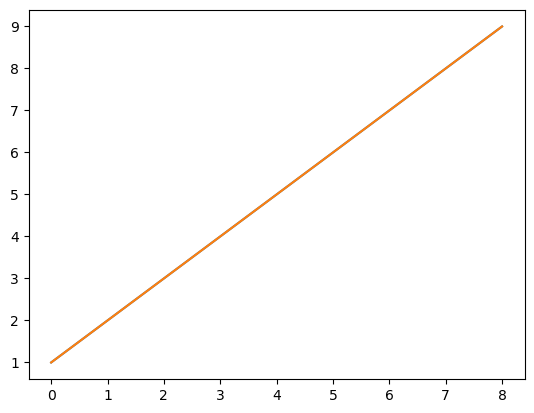

In [61]:
df['A'].plot()
plt.show()

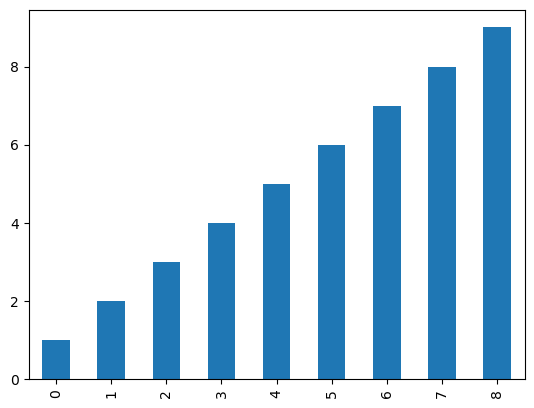

In [63]:
df['A'].plot(kind='bar')
plt.show()

Цей огляд охоплює найважливіші концепції Pandas, проте ця бібліотека дуже багата, і немає меж тому, що ви можете з нею зробити! Тепер застосуймо ці знання для вирішення конкретної задачі.



---

**Відмова від відповідальності**:  
Цей документ був перекладений за допомогою сервісу автоматичного перекладу [Co-op Translator](https://github.com/Azure/co-op-translator). Хоча ми прагнемо до точності, будь ласка, майте на увазі, що автоматичні переклади можуть містити помилки або неточності. Оригінальний документ на його рідній мові слід вважати авторитетним джерелом. Для критичної інформації рекомендується професійний людський переклад. Ми не несемо відповідальності за будь-які непорозуміння або неправильні тлумачення, що виникають внаслідок використання цього перекладу.
